# Data Curation and Analysis of the Top 1000 Global Universities

**Francis Tang fjt378, 3/1/2023**

## Data ETL (Extract, Transform, Load)

Started by importing the necessary libraries, namely BeautifulSoup, pandas, and requests, and also sys.

In [71]:
try:
    from bs4 import BeautifulSoup
    import pandas
    print ("BeautifulSoup and Pandas are already installed and imported")
except:
    import sys
    !conda install --yes --prefix {sys.prefix} bs4
    !conda install --yes --prefix {sys.prefix} pandas
    from bs4 import BeautifulSoup
    import pandas
    print ("BeautifulSoup and Pandas were not found. Installed them and imported")

import requests

BeautifulSoup and Pandas are already installed and imported


Reading in the webpage and parsing it with BeautifulSoup

In [189]:
opened_webpage = requests.get("https://en.wikipedia.org/wiki/List_of_top_1000_universities_in_the_world")
print ("Webpage opened successfully...")

bs = BeautifulSoup(opened_webpage.text, "html.parser")
print ("Webpage loaded and parsed successfully...")

Webpage opened successfully...
Webpage loaded and parsed successfully...


### Extract

In [73]:
table_name = 'wikitable sortable' 
raw_data = bs.find('table', {'class':table_name})
#print(raw_data)

<table class="wikitable sortable">
<tbody><tr>
<th>University
</th>
<th>Country
</th>
<th>THE 2022<sup class="reference" id="cite_ref-1"><a href="#cite_note-1">[1]</a></sup>
</th>
<th>QS 2023<sup class="reference" id="cite_ref-2"><a href="#cite_note-2">[2]</a></sup>
</th>
<th>ARWU 2021<sup class="reference" id="cite_ref-3"><a href="#cite_note-3">[3]</a></sup>
</th>
<th>USNWR 2022 <sup class="reference" id="cite_ref-4"><a href="#cite_note-4">[4]</a></sup>
</th>
<th>Average *
</th>
<th>Ranking based on the average
</th></tr>
<tr>
<td><a href="/wiki/Harvard_University" title="Harvard University">Harvard University</a></td>
<td>United States</td>
<td>2</td>
<td>5</td>
<td>1
</td>
<td>1
</td>
<td>2.3
</td>
<td>1
</td></tr>
<tr>
<td><a href="/wiki/Massachusetts_Institute_of_Technology" title="Massachusetts Institute of Technology">Massachusetts Institute of Technology</a> (MIT)</td>
<td>United States</td>
<td>5</td>
<td>1</td>
<td>4
</td>
<td>2
</td>
<td>3.0
</td>
<td>2
</td></tr>
<tr>
<td><

### Transform

Started by using the pandas library to convert my raw data into a dataframe, and will then proceed with cleaning it and loading it into a CSV file.

In [75]:
df = pandas.read_html(str(raw_data))
final_data = pandas.DataFrame(df[0])
print(final_data)

                                       University         Country THE 2022[1]  \
0                              Harvard University   United States           2   
1     Massachusetts Institute of Technology (MIT)   United States           5   
2                             Stanford University   United States           4   
3                            University of Oxford  United Kingdom           1   
4                         University of Cambridge  United Kingdom           5   
...                                           ...             ...         ...   
1185                         University of Passau         Germany     351-400   
1186        North China Electric Power University           China         NaN   
1187  Institut National Polytechnique de Toulouse          France         NaN   
1188   Wuhan University of Science and Technology           China         NaN   
1189                    Dalian Medical University           China         NaN   

     QS 2023[2] ARWU 2021[3

#### Duplication Checks and Cleaning
Deleting any potential duplicate rows (duplicate universities)

In [187]:
number_of_duplicates = final_data.duplicated().sum()
print (f" Number of duplicates before : {number_of_duplicates}")

final_data = final_data.drop_duplicates()

number_of_duplicates = final_data.duplicated().sum()
print (f" Number of duplicates after removing : {number_of_duplicates}")

 Number of duplicates before : 0
 Number of duplicates after removing : 0


#### Inspecting data and checking noisy entries
Of the 1187 entries for universities, I decided to drop the ones which have an empty value for average ranking (the column "Average *")

In [79]:
final_data = final_data.dropna(subset = ["Average *"])

indexDrop = final_data[(final_data['Average *'] == "--")].index
final_data.drop(indexDrop , inplace=True)

print(final_data)

                                            University         Country  \
0                                   Harvard University   United States   
1          Massachusetts Institute of Technology (MIT)   United States   
2                                  Stanford University   United States   
3                                 University of Oxford  United Kingdom   
4                              University of Cambridge  United Kingdom   
..                                                 ...             ...   
295                           Université de Strasbourg          France   
324  Southern University of Science and Technology ...           China   
562                             University of Delaware   United States   
707                   Université Claude Bernard Lyon 1          France   
961                               Université de Nantes          France   

    THE 2022[1] QS 2023[2] ARWU 2021[3]  USNWR 2022 [4] Average *  \
0             2          5            1   

Kept 206 schools after dropping ones with a null value for their average ranking, now converting all the average values to floats and describing them.

In [186]:
def clean_string_and_convert_float(s):
    converted = float(s)
    return converted

final_data["Average *"] = final_data["Average *"].apply(clean_string_and_convert)
print(final_data["Average *"].describe())

count    206.000000
mean     146.078350
std      128.031915
min        2.300000
25%       61.800000
50%      115.300000
75%      209.410000
max      803.500000
Name: Average *, dtype: float64


### Load

Loading the dataframe onto a csv on my local computer.

In [86]:
final_data.to_csv("College_Rankings.csv")

## Analysis: Summary and Visualizations:


**Analysis**

I plan on looking at the average ranking of schools in the global top 1000 for 5 major countries, which I chose to be the US, the UK, France, China, and Canada. For each of these countries, I looked at number of schools within each average rating range (lower rated means closer to the top), hoping to gain insight into the strength of schools in each of these countries. I noticed that the United States had by far the greatest number of schools within the global top 1000, and a large portion of them made up the top 300 schools globally. The data also noticably skews right. The UK's top schools were all within the top 300, with a right skew. The distribution of French schools was very clearly bimodal, although there were only three schools in total. Two of the three were ranked between 200 and 400, and the other was between 600 and 700. This also means that it shows a right skew, but this is based on very few data points for this country specifically. The number of Chinese schools within the global top 1000 was normally distributed and unimodal, with all eight of them lying between the 100 to 400th place. Canada had 6 schools within the global top 1000, and are all within the ranks 100 to 300, and showing a right skewed distribution. 

Combining my analysis of information from the graphs, the most obvious trend that I noticed was that each of these five major countries had a most of their top schools within the top of these 1000 global best schools. This is somewhat to be expected, because these major countries should be more developed and more equipt financially to operate and fund top schools. This leads to major talent from other smaller countries to come to these major countries for education, rather than schools in their home country, likely contributing to the high rankings of these top schools in major countries.

**Grouping the dataframe to create seperate dataframes for each of the 5 major countries I chose (US, UK, France, China, Canada)**

In [132]:
country_grouped = final_data.groupby(["Country"])

us_data = country_grouped.get_group("United States")
uk_data = country_grouped.get_group("United Kingdom")
france_data = country_grouped.get_group("France")
china_data = country_grouped.get_group("China")
canada_data = country_grouped.get_group("Canada")

**Descriptive Statistics and Histogram on the Average Ranking of US Colleges in the Global Top 1000**

count     63.000000
mean     127.460317
std      151.513265
min        2.300000
25%       31.000000
50%       91.500000
75%      153.500000
max      793.000000
Name: Average *, dtype: float64


Text(0, 0.5, 'Number of schools within this ranking range')

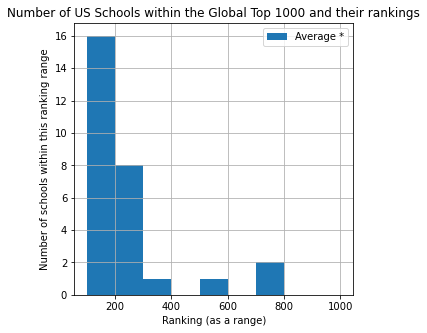

In [179]:
print(us_data["Average *"].describe())

plt = us_data.plot(kind = "hist",column = "Average *", bins=[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000] , title = "Number of US Schools within the Global Top 1000 and their rankings",
             grid = True, figsize = (5,5))

plt.set_xlabel("Ranking (as a range)")
plt.set_ylabel("Number of schools within this ranking range")

**Descriptive Statistics and Histogram on the Average Ranking of UK Colleges in the Global Top 1000**

count     26.000000
mean     117.319615
std       76.220435
min        4.300000
25%       52.300000
50%      114.150000
75%      156.175000
max      253.640000
Name: Average *, dtype: float64


Text(0, 0.5, 'Number of schools within this ranking range')

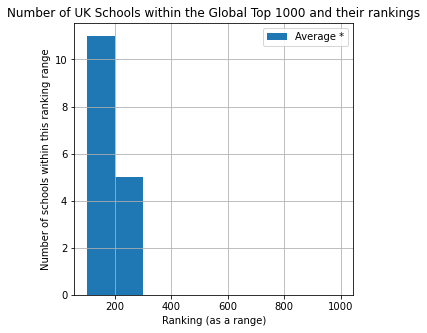

In [180]:
print(uk_data["Average *"].describe())

plt = uk_data.plot(kind = "hist",column = "Average *", bins=[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], title = "Number of UK Schools within the Global Top 1000 and their rankings",
             grid = True, figsize = (5,5))

plt.set_xlabel("Ranking (as a range)")
plt.set_ylabel("Number of schools within this ranking range")

**Descriptive Statistics and Histogram on the Average Ranking of French Colleges in the Global Top 1000**

count      8.000000
mean     253.417500
std      196.432828
min       57.300000
25%       85.050000
50%      243.005000
75%      325.625000
max      642.930000
Name: Average *, dtype: float64


Text(0, 0.5, 'Number of schools within this ranking range')

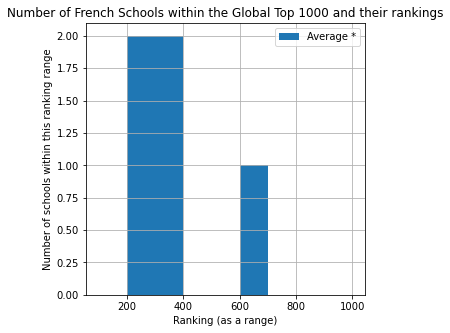

In [181]:
print(france_data["Average *"].describe())

plt = france_data.plot(kind = "hist",column = "Average *", bins=[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], title = "Number of French Schools within the Global Top 1000 and their rankings",
             grid = True, figsize = (5,5))

plt.set_xlabel("Ranking (as a range)")
plt.set_ylabel("Number of schools within this ranking range")

**Descriptive Statistics and Histogram on the Average Ranking of Chinese Colleges in the Global Top 1000**

count     14.000000
mean     170.138571
std      117.834179
min       21.000000
25%       74.625000
50%      158.250000
75%      259.912500
max      381.210000
Name: Average *, dtype: float64


Text(0, 0.5, 'Number of schools within this ranking range')

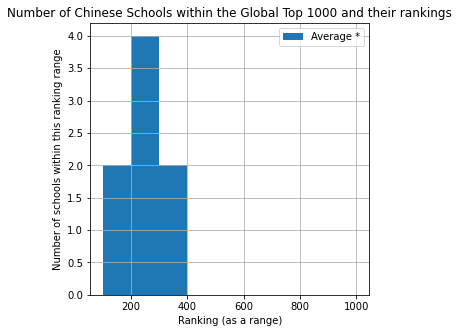

In [182]:
print(china_data["Average *"].describe())

plt = china_data.plot(kind = "hist",column = "Average *", bins=[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], title = "Number of Chinese Schools within the Global Top 1000 and their rankings",
             grid = True, figsize = (5,5))

plt.set_xlabel("Ranking (as a range)")
plt.set_ylabel("Number of schools within this ranking range")

**Descriptive Statistics and Histogram on the Average Ranking of Canadian Colleges in the Global Top 1000**

count      9.000000
mean     115.856667
std       69.723372
min       22.500000
25%       48.300000
50%      114.300000
75%      176.300000
max      220.210000
Name: Average *, dtype: float64


Text(0, 0.5, 'Number of schools within this ranking range')

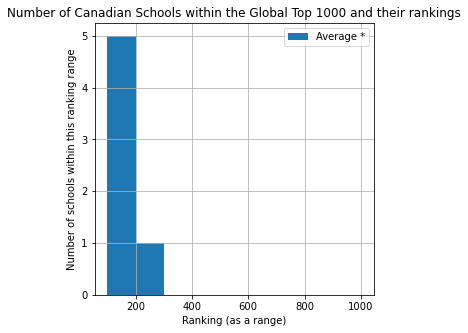

In [183]:
print(canada_data["Average *"].describe())

plt = canada_data.plot(kind = "hist",column = "Average *", bins=[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], title = "Number of Canadian Schools within the Global Top 1000 and their rankings",
             grid = True, figsize = (5,5))

plt.set_xlabel("Ranking (as a range)")
plt.set_ylabel("Number of schools within this ranking range")